# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from scipy.stats import describe

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Assesement: Foundations for Data Science/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print('There are {} rows and {} columns in the dataframe.'.format(df.shape[0], df.shape[1]))

There are 1898 rows and 9 columns in the dataframe


#### Observations:


There are 1898 rows and 9 columns in the dataframe

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


There are no null values. Dataframe has a mix of integer, float and object (aka string) dtypes.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
print('There are no missing values per the results from df.info() shown in last cell.')

There are no missing values per the results from df.info() shown in last cell.


#### Observations:


There are no missing values per the results from df.info() shown in last cell.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


The maximum food prep and delivery time is 35 and 33 mins where as the median is 27 and 25 mins. The maximum cost is 35.41 and mediam 14.14 US dollars.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
uniqueOrder = df['order_id'].unique()
condition = df['order_id'] == uniqueOrder
df[condition].groupby(['rating']).count()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,food_preparation_time,delivery_time
rating,,,,,,,,
3,188,188,188,188,188,188,188,188
4,386,386,386,386,386,386,386,386
5,588,588,588,588,588,588,588,588
Not given,736,736,736,736,736,736,736,736


#### Observations:


There are 736 orders unique order ids that were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<ipython-input-17-0c407accbfda>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'Not given'), Text(1, 0, '5'), Text(2, 0, '3'), Text(3, 0, '4')]

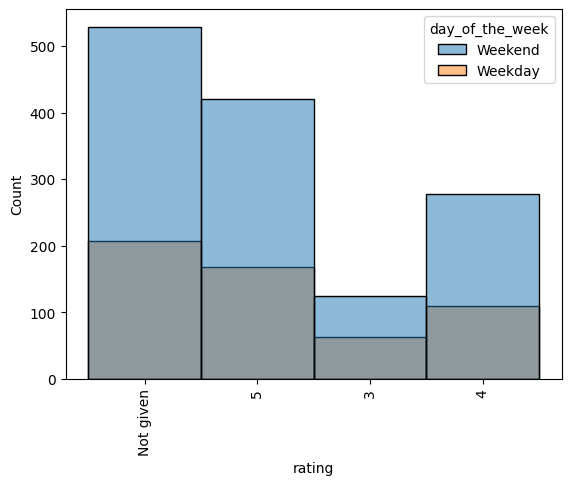

In [ ]:
# Histograms
g = sns.histplot(df, x='rating', hue='day_of_the_week')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<ipython-input-80-c74491fab49e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

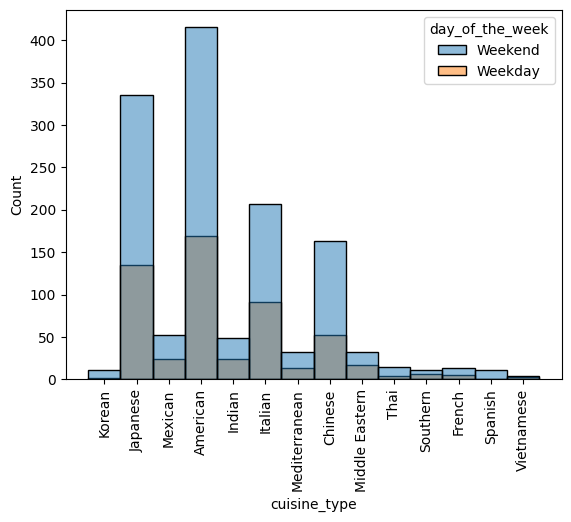

In [ ]:
# Histograms
g = sns.histplot(df, x='cuisine_type', hue='day_of_the_week')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<ipython-input-13-a35e94630457>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0.0, 0, '0'),
 Text(5.0, 0, '5'),
 Text(10.0, 0, '10'),
 Text(15.0, 0, '15'),
 Text(20.0, 0, '20'),
 Text(25.0, 0, '25'),
 Text(30.0, 0, '30'),
 Text(35.0, 0, '35'),
 Text(40.0, 0, '40')]

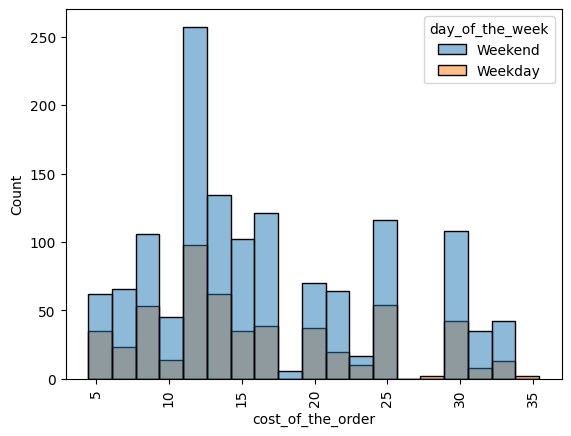

In [ ]:
# Histograms
g = sns.histplot(df, x='cost_of_the_order', hue='day_of_the_week')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<ipython-input-14-f4112e7c4a9b>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(18.0, 0, '18'),
 Text(20.0, 0, '20'),
 Text(22.0, 0, '22'),
 Text(24.0, 0, '24'),
 Text(26.0, 0, '26'),
 Text(28.0, 0, '28'),
 Text(30.0, 0, '30'),
 Text(32.0, 0, '32'),
 Text(34.0, 0, '34'),
 Text(36.0, 0, '36')]

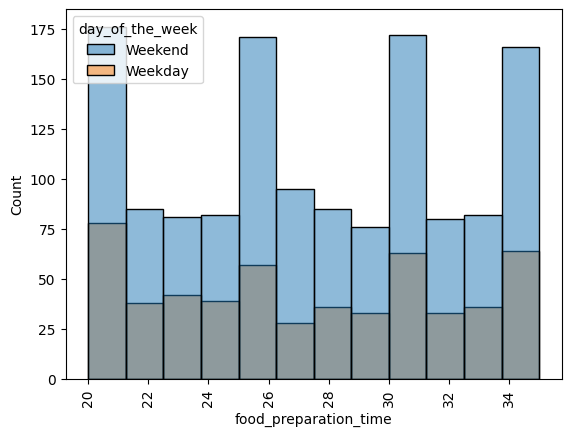

In [ ]:
# Histograms
g = sns.histplot(df, x='food_preparation_time', hue='day_of_the_week')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<ipython-input-15-446fb8fdcf88>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(12.5, 0, '12.5'),
 Text(15.0, 0, '15.0'),
 Text(17.5, 0, '17.5'),
 Text(20.0, 0, '20.0'),
 Text(22.5, 0, '22.5'),
 Text(25.0, 0, '25.0'),
 Text(27.5, 0, '27.5'),
 Text(30.0, 0, '30.0'),
 Text(32.5, 0, '32.5'),
 Text(35.0, 0, '35.0')]

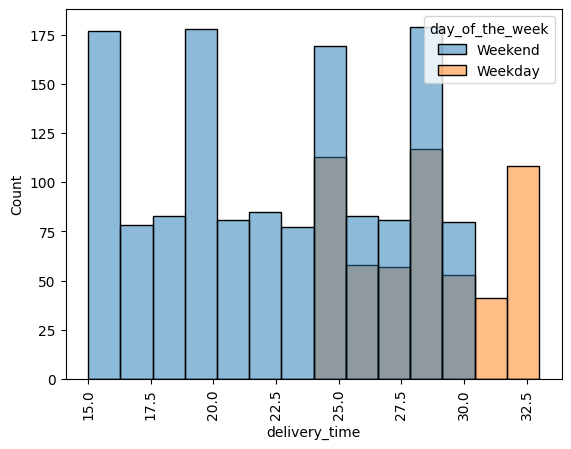

In [ ]:
g = sns.histplot(df, x='delivery_time', hue='day_of_the_week')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

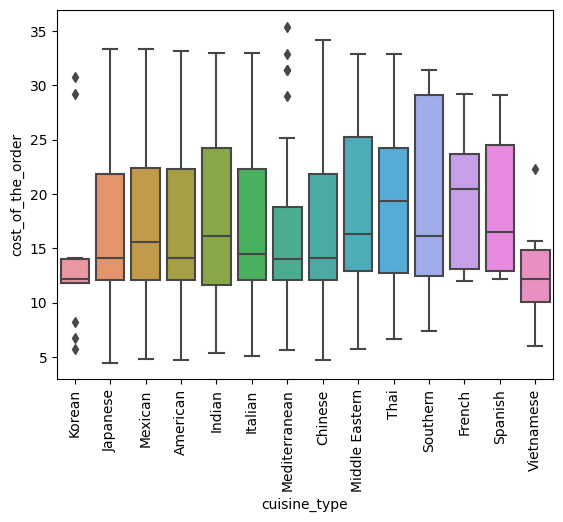

In [ ]:
g = sns.boxplot(df, x='cuisine_type', y='cost_of_the_order')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')]

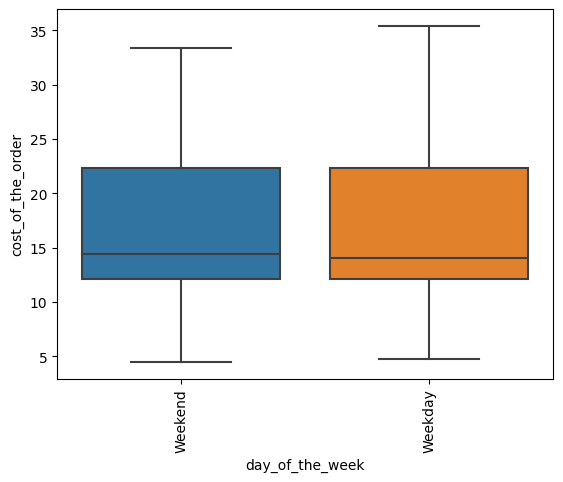

In [ ]:
g = sns.boxplot(df, x='day_of_the_week', y='cost_of_the_order')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')]

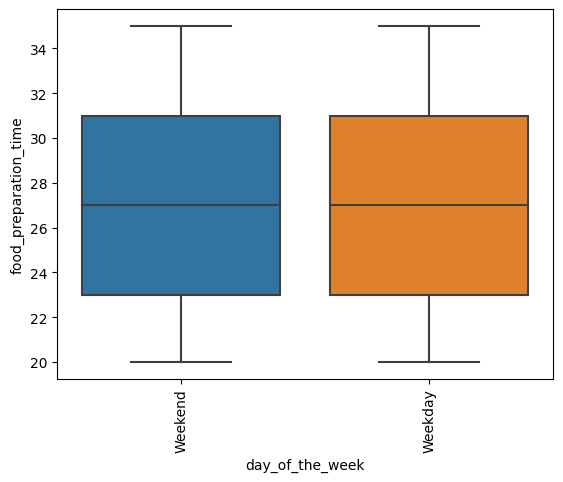

In [ ]:
g = sns.boxplot(df, x='day_of_the_week', y='food_preparation_time')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')]

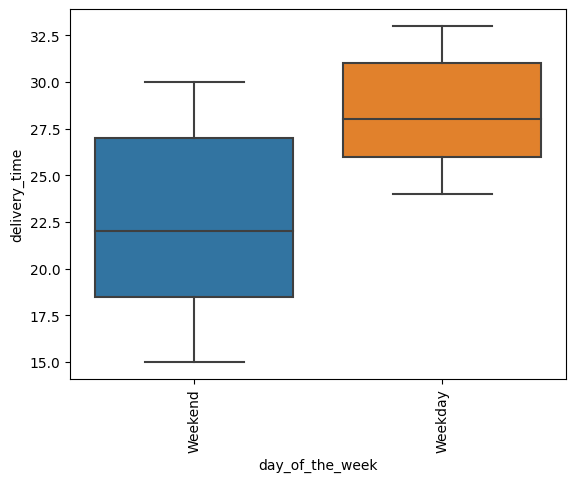

In [ ]:
g = sns.boxplot(df, x='day_of_the_week', y='delivery_time')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df.groupby('restaurant_name').count().sort_values(by='order_id', ascending=False)

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,219,219,219,219,219,219,219,219
The Meatball Shop,132,132,132,132,132,132,132,132
Blue Ribbon Sushi,119,119,119,119,119,119,119,119
Blue Ribbon Fried Chicken,96,96,96,96,96,96,96,96
Parm,68,68,68,68,68,68,68,68
...,...,...,...,...,...,...,...,...
Klong,1,1,1,1,1,1,1,1
Kambi Ramen House,1,1,1,1,1,1,1,1
Il Bambino,1,1,1,1,1,1,1,1


#### Observations:


The top five restaurants by orders are Shake Shake, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken.

More orders are delivered on Weekends and the cuisine types are mostly American, Japenese, Italian and Chinese in that order.

The delivery time on the weekdays is much higher. There are likely no significant differences in food preparation time and order costs when comparing the weekend and weekday.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

<ipython-input-97-cdbd7c411874>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

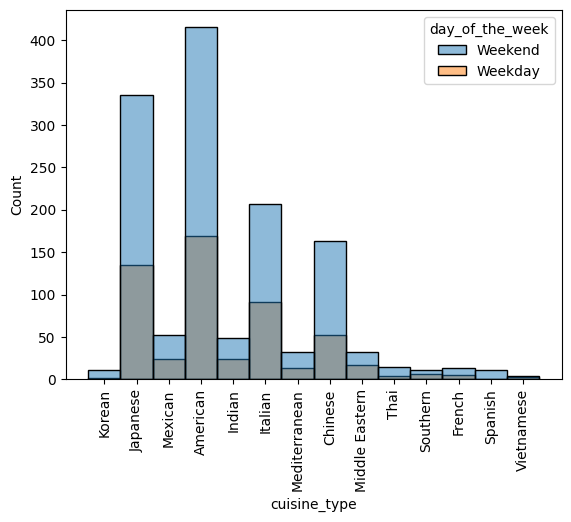

In [ ]:
# Write the code here
g = sns.histplot(df, x='cuisine_type', hue='day_of_the_week')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Observations:


American food is the most popular followed by Japanese foods.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
condition = df['cost_of_the_order'] > 20
df['cost_of_the_order'][condition].count() / df['cost_of_the_order'].count() * 100

29.24130663856691

#### Observations:


Twenty-nine percent of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


The mean delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df.groupby('customer_id').count().sort_values('order_id', ascending=False)

,order_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
customer_id,,,,,,,,
52832,13,13,13,13,13,13,13,13
47440,10,10,10,10,10,10,10,10
83287,9,9,9,9,9,9,9,9
250494,8,8,8,8,8,8,8,8
65009,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...
105903,1,1,1,1,1,1,1,1
105992,1,1,1,1,1,1,1,1
106006,1,1,1,1,1,1,1,1


#### Observations:


Customers 52832, 47440 and 832287 (the top 3 customer by number of orders) had 13, 10 and 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-12-c7938ee1958c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

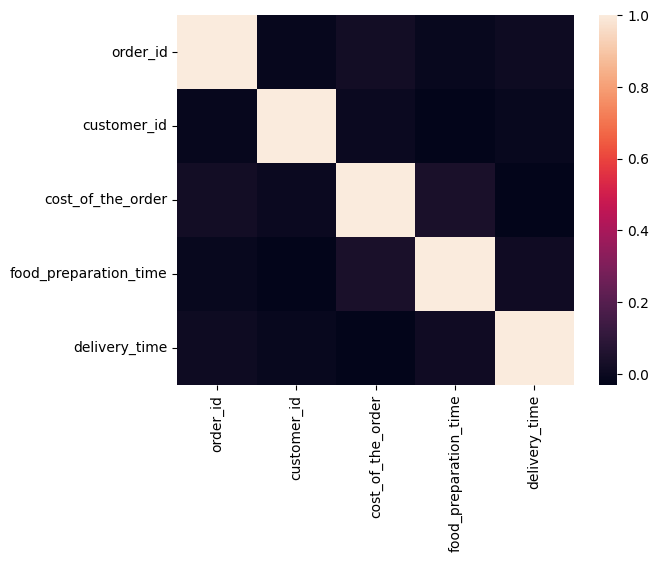

In [ ]:
# Write the code here
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Rating by cuisine type sale volume')

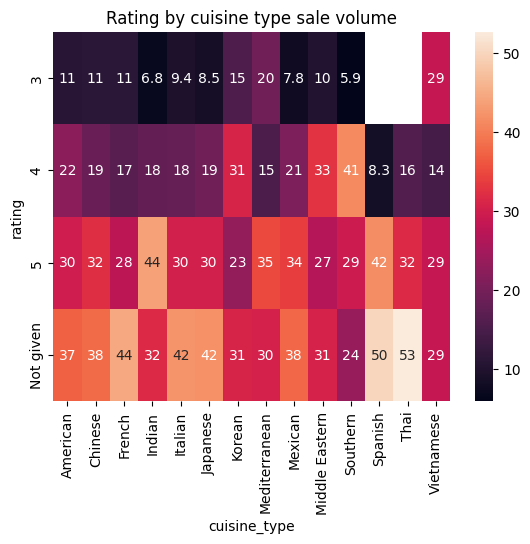

In [ ]:
# look at rating as percent of sale volumes
totalByType = df.groupby('cuisine_type').count()['order_id']
g = sns.heatmap(pd.pivot_table(df, values = 'order_id' , index = 'rating', columns = 'cuisine_type', aggfunc = 'count') / totalByType * 100, annot=True)
g.set_title('Rating by cuisine type sale volume')

In [ ]:
# look at rating as percent of sale volumes
totalByType = df.groupby('restaurant_name').count()['order_id']
table = pd.pivot_table(df, values = 'order_id' , index = 'rating', columns = 'restaurant_name', aggfunc = 'count') / totalByType * 100
table.T.sort_values('3',ascending = False)

rating,3,4,5,Not given
restaurant_name,,,,
Haveli Indian Restaurant,100.000000,NaN,NaN,NaN
Woorijip,100.000000,NaN,NaN,NaN
Pepe Giallo,100.000000,NaN,NaN,NaN
Sushi Choshi,100.000000,NaN,NaN,NaN
Nha Trang One,100.000000,NaN,NaN,NaN
Sarabeth's West,100.000000,NaN,NaN,NaN
Joe's Shanghai _Àü£¾÷´,50.000000,NaN,50.000000,NaN
Blue Ribbon Brooklyn,50.000000,25.000000,NaN,25.000000
Byblos Restaurant,50.000000,NaN,NaN,50.000000


In [ ]:
# look at rating as percent of sale volumes
totalByType = df.groupby('restaurant_name').count()['order_id']
table = pd.pivot_table(df, values = 'order_id' , index = 'rating', columns = 'restaurant_name', aggfunc = 'count') / totalByType * 100
table.T.sort_values('Not given',ascending = False)

rating,3,4,5,Not given
restaurant_name,,,,
Market Table,NaN,NaN,NaN,100.000000
Tarallucci e Vino Restaurant,NaN,NaN,NaN,100.000000
La Follia,NaN,NaN,NaN,100.000000
Lamarca Pasta,NaN,NaN,NaN,100.000000
Gaia Italian Cafe,NaN,NaN,NaN,100.000000
Friend of a Farmer,NaN,NaN,NaN,100.000000
Le Zie 2000 Trattoria,NaN,NaN,NaN,100.000000
Emporio,NaN,NaN,NaN,100.000000
Paul & Jimmy's,NaN,NaN,NaN,100.000000


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
prefilter = df['rating'] != 'Not given'
df2 = df[prefilter]
df2['rating'] = df2['rating'].astype('int')
filter = ( df2.groupby('restaurant_name')['order_id'].count() > 50 ) & ( df2.groupby('restaurant_name')['rating'].mean() > 4 )
pd.DataFrame(filter, columns=['Promo Offer']).sort_values('Promo Offer', ascending = False)


<ipython-input-140-f8062ba70707>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rating'] = df2['rating'].astype('int')


,Promo Offer
restaurant_name,
Shake Shack,True
Blue Ribbon Sushi,True
Blue Ribbon Fried Chicken,True
The Meatball Shop,True
'wichcraft,False
Pinto Nouveau Thai Bistro,False
Prosperity Dumpling,False
Pylos,False
Ravagh Persian Grill,False


#### Observations:


The following restaurants would get the promotional offer:
* Shake Shack
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
condition = df['cost_of_the_order'] > 20
condition2 = ( df['cost_of_the_order'] <= 20 ) & ( df['cost_of_the_order'] > 5 )
df['revenue1'] = df[condition]['cost_of_the_order'] * 0.25
df['revenue2'] = df[condition2]['cost_of_the_order'] * 0.15
df['revenue1'].sum() + df['revenue2'].sum()

6166.303

#### Observations:


The total revenue for the company is $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['Total Time'] = df['food_preparation_time'] + df['delivery_time']
condition = df['Total Time'] > 60
df[condition]['order_id'].count() / df['order_id'].count() * 100

10.537407797681771

#### Observations:


Ten percent of the orders take make than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:


The delivery time is faster on the weekend in comparison to the weekday.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

Text(0.5, 1.0, 'Rating by cuisine type sale volume')

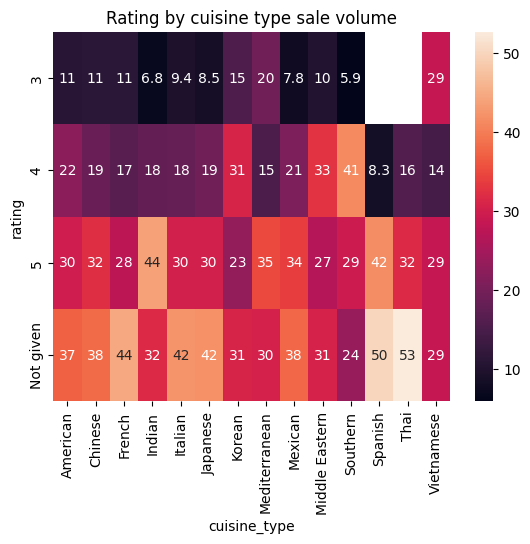

In [ ]:
# look at rating as percent of sale volumes
totalByType = df.groupby('cuisine_type').count()['order_id']
g = sns.heatmap(pd.pivot_table(df, values = 'order_id' , index = 'rating', columns = 'cuisine_type', aggfunc = 'count') / totalByType * 100, annot=True)
g.set_title('Rating by cuisine type sale volume')

[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

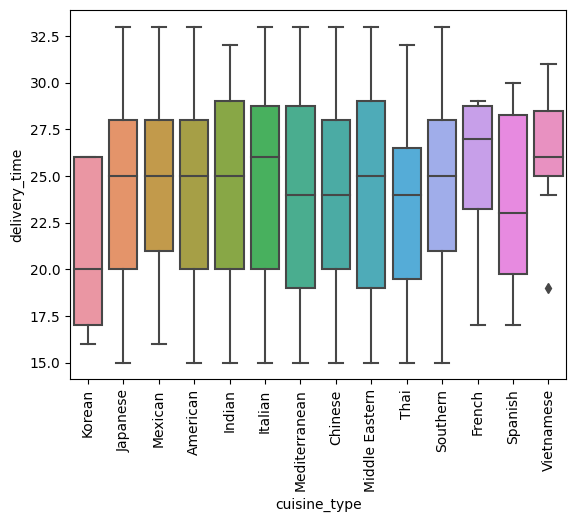

In [ ]:
g = sns.boxplot(df, x='cuisine_type', y='delivery_time')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

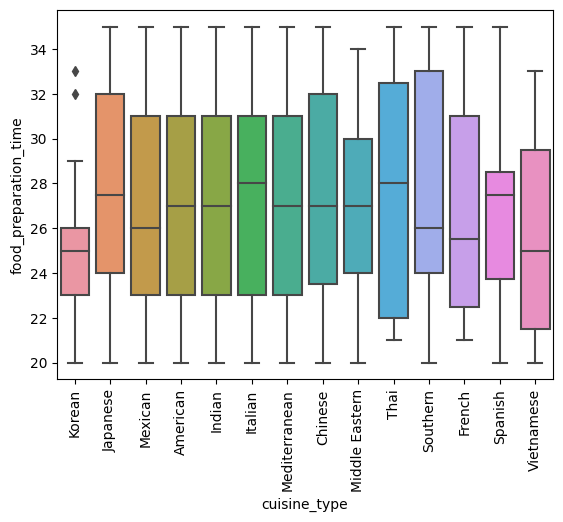

In [ ]:
g = sns.boxplot(df, x='cuisine_type', y='food_preparation_time')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Conclusions:
* Generally ~30-40% of orders do not get a rating
* Approximatley 10% of orders get a 3 rating
* Vietnamese food has the largest percent (30%) of orders that recieve a 3 rating
* Mediterranean food comes in second for the highest percent of orders recieving a 3 rating
* Southern food has 41% of it's orders recieving a 4 rating
* Delivery and food preparation time does not seem to be associated with the Mediterrenean and Southern cuisine types ratings; however Vitenamese foods do have longer delivery times than all other cuisine types.

### Recommendations:

*  One option is to drive revenue by enhancing the quality of service thus potentially creating new demand. The areas of oppurtunity are:

  * Potential causes for low rating could be the delivery or food preparation time. Specifically work with the Vietnamese cuisine types to lower delivery time. This association was not present for the other low rating cuisine type Mediterranean foods.
  * Work with service quality enhancements for the cusine types that have the largest percent of their orders with 3 ratings. These cusine types are Vietnamese and Mediterranean.


---